In [580]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14
LARGE_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)  # fontsize of the figure title

In [558]:
r_fname = 'healthgrades_physicians_GI_NY_full_raw.csv'
fname = 'healthgrades_physicians_GI_NY_full.csv'
# Remove blank lines in raw csv file (scrapy bug for windows)
raw_data = pd.read_csv(r_fname)

# do not write index column
raw_data.to_csv(fname, index = False)  

# read in fixed csv file
data = pd.read_csv(fname) 
print(data.shape)
print(data.columns)

(947, 20)
Index(['addr_street', 'age', 'city', 'detailed_url', 'doc_rating', 'featured',
       'gender', 'hcp_id', 'hosp_fellow', 'hosp_md', 'hosp_res', 'name',
       'num_ins', 'num_reviews', 'practice_addr', 'practice_name', 'rating',
       'staff_rating', 'state', 'zipcode'],
      dtype='object')


In [559]:
for field in data.columns:
    print(field, type(data.loc[0,field]))

addr_street <class 'str'>
age <class 'numpy.float64'>
city <class 'str'>
detailed_url <class 'str'>
doc_rating <class 'str'>
featured <class 'numpy.int64'>
gender <class 'str'>
hcp_id <class 'str'>
hosp_fellow <class 'str'>
hosp_md <class 'str'>
hosp_res <class 'str'>
name <class 'str'>
num_ins <class 'numpy.float64'>
num_reviews <class 'numpy.int64'>
practice_addr <class 'str'>
practice_name <class 'str'>
rating <class 'numpy.float64'>
staff_rating <class 'str'>
state <class 'str'>
zipcode <class 'numpy.int64'>


In [560]:
# check for duplicates based on hcp_id, there shouldn't be any
np.sum(data.duplicated(subset = ['hcp_id']))

0

In [561]:
# change zipcode to 5 digit string    
if data['zipcode'].dtype == 'int64':
    data['zipcode'] = data['zipcode'].apply(lambda x: '{0:05d}'.format(x))

# fix some empty values in gender
data.loc[ data['gender'].isin(['Male','Female']) == False, ['gender'] ] = np.nan

In [562]:
pd.set_option('display.max_columns', 50)
# data.head(5)
data.sample(5)
# data.tail(5)

,addr_street,age,city,detailed_url,doc_rating,featured,gender,hcp_id,hosp_fellow,hosp_md,hosp_res,name,num_ins,num_reviews,practice_addr,practice_name,rating,staff_rating,state,zipcode
206,853 Tiffany St,48.0,Bronx,/physician/dr-bhavna-balar-yw4vw,NaN,0,Female,dr-bhavna-balar-yw4vw,NaN,"M P Shah Medical College, Saurashtra University",NaN,"Dr. Bhavna Balar, MD",NaN,0,"853 Tiffany St, Bronx, NY, 10459",Bronxcare,NaN,NaN,NY,10459
427,423 E 23rd St,84.0,New York,/physician/dr-morton-bender-gh5b8,NaN,0,Male,dr-morton-bender-gh5b8,NaN,NaN,NaN,"Dr. Morton Bender, MD",NaN,0,"423 E 23rd St, New York, NY, 10010",VETERANS AFFAIRS MEDICAL CENTER,NaN,NaN,NY,10010
640,2211 Emmons Ave,NaN,Brooklyn,/physician/dr-jack-braha-y8k78,5.0|5.0|5.0|5.0,0,Male,dr-jack-braha-y8k78,NaN,"New York College Of Osteopathic Medicine, New ...",NaN,"Dr. Jack Braha, DO",NaN,6,"2211 Emmons Ave, Brooklyn, NY, 11235",Brooklyn Gastro/Endoscpy PLLC,5.0,4.5|5.0|4.5,NY,11235
604,1305 York Ave,49.0,New York,/physician/dr-christine-frissora-rodeo-yhls2,3.5|4.0|4.0|4.0,0,Female,dr-christine-frissora-rodeo-yhls2,Colum-St Lukes RHC,Weill Cornell Medical College,Mount Sinai Medical Center,"Dr. Christine Frissora-Rodeo, MD",NaN,52,"1305 York Ave, New York, NY, 10021",Ira M Jacobson MD,4.0,4.0|4.5|4.0,NY,10021
780,17 E 102nd St Fl 5,65.0,New York,/physician/dr-steven-itzkowitz-2r7gh,5.0|5.0|5.0|5.0,0,Male,dr-steven-itzkowitz-2r7gh,Ucsf Hosps,Mount Sinai School Of Medicine Of New York Uni...,Bellevue Hospital Center,"Dr. Steven Itzkowitz, MD",NaN,6,"17 E 102nd St Fl 5, New York, NY, 10029",Mount Sinai Gastroenterology,5.0,5.0|5.0|5.0,NY,10029


In [563]:
# count % of missing values by column
mv_cols = pd.DataFrame(data = np.sum(data.isnull(), axis = 0) / data.shape[0], columns = ['pct_mv'] )
print(mv_cols.to_string(formatters = {'pct_mv': '{:.0%}'.format}))

              pct_mv
addr_street       0%
age              22%
city              0%
detailed_url      0%
doc_rating       28%
featured          0%
gender            7%
hcp_id            0%
hosp_fellow      41%
hosp_md          25%
hosp_res         33%
name              0%
num_ins          93%
num_reviews       0%
practice_addr     0%
practice_name    12%
rating           28%
staff_rating     29%
state             0%
zipcode           0%


In [564]:
# convert detailed doc_rating and staff_rating from string to float
def split_score(data_series):
    y = []
    for x in data_series:
        if pd.isna(x) == False:
            y.append(np.mean([float(xi) for xi in x.split('|')]))
        else:
            y.append(x)
    return y

data['doc_score'] = split_score(data['doc_rating'])

# print(data['doc_rating'].head(5))
# print(data['doc_score'].head(5))

# print(data['doc_rating'].tail(5))
# print(data['doc_score'].tail(5))


In [565]:
# convert detailed staff_rating from string to float

data['staff_score'] = split_score(data['staff_rating'])

# print(data['staff_rating'].head(5))
# print(data['staff_score'].head(5))
# print(data['staff_rating'].tail(5))
# print(data['staff_score'].tail(5))
# data.columns
# data.head(2)

In [566]:
# drop the two string columns 
data = data.drop(columns=['doc_rating', 'staff_rating'])
data.columns

Index(['addr_street', 'age', 'city', 'detailed_url', 'featured', 'gender',
       'hcp_id', 'hosp_fellow', 'hosp_md', 'hosp_res', 'name', 'num_ins',
       'num_reviews', 'practice_addr', 'practice_name', 'rating', 'state',
       'zipcode', 'doc_score', 'staff_score'],
      dtype='object')

In [567]:
# create indicator for whether the doctor has been reviewed or not
data['has_review'] = 1
data.loc[ newdata['num_reviews'] == 0, 'has_review'] = 0
data.loc[:,['num_reviews','has_review']].sample(10)

,num_reviews,has_review
183,1,1
805,2,1
830,12,1
942,78,1
616,13,1
684,1,1
728,10,1
566,33,1
123,4,1
930,8,1


Introduction of the dataset
Physician universe and demographics
- Distribution of age
- Create age groups
- Number of GI doctors in NY metro = 6% of national
- Gender distribution: 22% female vs. 18% national
    -- Gender over time (age group)
- * Educational history (where they came from)

Review analysis
Number of reviews: (num_reviews > 0 )
- distribution, group into L, M, H
- Number of reviews vs. rating
- Number of reviews vs. age

What drives rating? (num_reviews >= 5)
- Rating by age group
- Rating vs. doctor score vs. staff score
- Rating distribution by top institutions

Extreme analysis
- Doctors with large number of reviews: gender, age, location, rating
- Doctors whose doc_score is very different from staff_score (check comments) 

Top doctors based on both num of reviews and rating
- Top institution from which they were trained? 

Introduction of the dataset
- Acknowledgement of missing data.
- Definition of subsets of analysis (eg docs with at least 1 or at least 5 reviews)

Physician universe and demographics
- Number of GI doctors in NY metro = 6% of national
- Overall rating distribution

Influence of # of reviews
- Overall # of review distribution
- Number of reviews vs. rating (highlight top positive/negative)
- Doctors with large number of reviews: gender, age, location, rating

Influence of age
- Distribution of age
- Create age groups
- Number of reviews vs. age
- Rating by age group (are more experienced physicians better rated?)

Influence of gender
- Gender distribution: 22% female vs. 18% national
- # of reviews is skewed by gender...
- ...but rating distribution is not

Influnece of educational history
- * Educational history (where they came from)
- Rating distribution by top institutions
  (either #1 vs #2 or top few vs everyone else)

Influence of staff performance
- * Rating vs. doctor score vs. staff score: heatmap
- Extreme: Doctors whose doc_score is very different from staff_score (check comments) 
 

In [568]:
# summary stats of key numeric variables
data.loc[:,['age','has_review','num_reviews','rating','doc_score','staff_score']].describe()

,age,has_review,num_reviews,rating,doc_score,staff_score
count,737.000000,947.000000,947.000000,681.000000,680.000000,677.000000
mean,58.701493,0.719113,7.357973,4.070485,4.173897,4.143772
std,13.457276,0.449670,11.604459,0.932357,0.863816,0.767043
min,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,48.000000,0.000000,0.000000,3.500000,3.625000,3.833333
50%,59.000000,1.000000,4.000000,4.000000,4.500000,4.333333
75%,68.000000,1.000000,11.000000,5.000000,5.000000,4.666667
max,98.000000,1.000000,158.000000,5.000000,5.000000,5.000000


In [569]:
# take a look at categorical variables
data.loc[:,['gender','city','zipcode']].describe()

,gender,city,zipcode
count,884,947,947
unique,2,41,118
top,Male,New York,10016
freq,688,540,85


In [570]:
# *
# gender distribution (884 doctors with gender info, 7% missing)
# total 688 male and 196 female doctors: 78% of NY metro GI docs in the HG database are male 
# to look up: % F / M GI docs in the US = 17.6% (out of 14,728 total)
print(data.gender.value_counts())

# counts of each variable split by gender
# 75% of male doctors have been reviewed, while only 57% of female doctors have been reviewed
data.groupby('gender').count()

Male      688
Female    196
Name: gender, dtype: int64


,addr_street,age,city,detailed_url,featured,hcp_id,hosp_fellow,hosp_md,hosp_res,name,num_ins,num_reviews,practice_addr,practice_name,rating,state,zipcode,doc_score,staff_score,has_review
gender,,,,,,,,,,,,,,,,,,,,
Female,196,112,196,196,196,196,70,104,82,196,2,196,196,165,112,196,196,112,110,196
Male,688,567,688,688,688,688,439,551,500,688,5,688,688,605,519,688,688,518,517,688


In [571]:
# doc distribution by zipcode
print(data.zipcode.value_counts())

10016    85
10029    83
10021    58
10032    52
10065    39
11375    25
10003    24
11209    23
10128    23
11355    21
10022    20
10028    20
11219    19
10019    18
10010    18
11373    18
11235    16
10075    16
11201    16
11203    15
10013    13
07103    13
10017    12
10038    11
10024    10
11229    10
11215     9
10451     8
11217     8
11220     8
         ..
11420     1
10598     1
10452     1
11216     1
11233     1
07010     1
10009     1
07031     1
11243     1
10080     1
10018     1
11419     1
10006     1
07032     1
07029     1
07105     1
07310     1
11249     1
11379     1
07307     1
06405     1
11103     1
10567     1
07087     1
10459     1
10031     1
11225     1
10033     1
11416     1
10701     1
Name: zipcode, Length: 118, dtype: int64


(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 <a list of 10 Text yticklabel objects>)

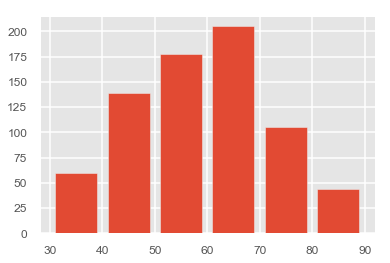

In [572]:
# age distribution: 22% missing
plt.hist(data.age.dropna(), rwidth = 0.8, bins = range(30,100,10))
plt.xticks(range(30,100,10), fontsize = 12)
plt.yticks(fontsize = 12)

Text(0.5,1,'Histogram of Number of Reviews for Gastroenterologists in New York Metro Area')

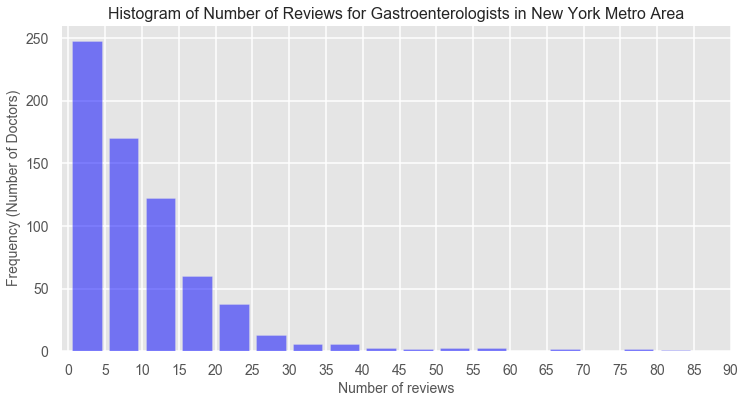

In [574]:
# overall distribution of the number of reviews among doctors with at least one review (681, 72%)
subdata = data[ data['has_review'] == 1]
bstep = 5
bmax = int(round(subdata.num_reviews.max()/bstep)*bstep)
plt.figure(figsize=(12,6))
hout = plt.hist(subdata.num_reviews.dropna(), bins = range(0,bmax,bstep), color = "blue", alpha = 0.5, rwidth = 0.8)
plt.xticks(np.arange(-bstep*2,bmax+2*bstep,bstep), fontsize = 14)
plt.yticks(fontsize = 14)    
plt.xlim([-1,90])
plt.xlabel('Number of reviews', fontsize = 14)
plt.ylabel('Frequency (Number of Doctors)',fontsize = 14)
plt.title('Histogram of Number of Reviews for Gastroenterologists in New York Metro Area', fontsize = 16)

In [575]:
#plt.figure()
#plt.plot(x = hout[1][1:], y = np.cumsum(hout[0])/np.sum(hout[0]) ) 
print(list(zip(hout[1][1:],np.cumsum(hout[0])/np.sum(hout[0]))))
# 20% doctors have >= 15 reviews 
# 39% doctors have >= 10 reviews
# 64% doctors have >= 5 reviews

[(5, 0.36470588235294116), (10, 0.6147058823529412), (15, 0.7941176470588235), (20, 0.8823529411764706), (25, 0.9382352941176471), (30, 0.9573529411764706), (35, 0.9661764705882353), (40, 0.975), (45, 0.9794117647058823), (50, 0.9823529411764705), (55, 0.986764705882353), (60, 0.9911764705882353), (65, 0.9911764705882353), (70, 0.9941176470588236), (75, 0.9941176470588236), (80, 0.9970588235294118), (85, 0.9985294117647059), (90, 0.9985294117647059), (95, 0.9985294117647059), (100, 0.9985294117647059), (105, 0.9985294117647059), (110, 0.9985294117647059), (115, 1.0), (120, 1.0), (125, 1.0), (130, 1.0), (135, 1.0), (140, 1.0), (145, 1.0), (150, 1.0), (155, 1.0)]


In [576]:
# Create categorical variable (L/M/H) based on num_reviews
# cut_bins = pd.IntervalIndex.from_tuples([(0, 5), (5, 10), (10, 200)])
# n_rev_c = pd.DataFrame(pd.cut(subdata['num_reviews'], bins = [0,5,10,200], right = False,  \
#                              labels = ['L', 'M', 'H'] ))

subdata['n_rev_c'] = pd.cut(subdata['num_reviews'], bins = [0,5,10,200], right = False,  \
                             labels = ['L', 'M', 'H'] )
subdata.loc[:,['num_reviews','n_rev_c']].head(10)
subdata['n_rev_c'].dtype

C:\Users\yanqi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


CategoricalDtype(categories=['L', 'M', 'H'], ordered=True)

In [577]:
# who are the doctors with extremely large # of reviews
n_high = 50
subdata.loc[ subdata['num_reviews'] >= 50, ['name','age','gender','num_reviews', \
                                            'rating','practice_name','hosp_fellow', 'hosp_md'] ]

,name,age,gender,num_reviews,rating,practice_name,hosp_fellow,hosp_md
562,"Dr. Azeem Khan, MD",59.0,Male,57,4.0,Forest Hills Gastroenterology,New York Medical College Westchester Medical C...,"Grant Medical College, Maharashtra University ..."
570,"Dr. Gary Gorodokin, MD",57.0,Male,112,4.5,Platinum Wellness Center,Gastroenterology - Long Island College Hospital,Medical School at SUNY Downstate Medical Cente...
571,"Dr. Nilesh Mehta, MD",44.0,Male,57,4.0,Digestive Disease Care,Upstate Med Ctr SUNY-Syracuse,Mgm Medical College
577,"Dr. Vijaypal Arya, MD",56.0,Male,69,4.5,Vijaypal Arya Gastroenterology PC,Allegeny General Hospital (University Of Penns...,"Ravindra Nath Tagore Medical College, Rajastha..."
578,"Dr. Preeti Mehta, MD",44.0,Female,77,4.5,Digestive Disease Care,SUNY-Syracuse/Upstate Med Ctr,Mount Sinai School Of Medicine Of New York Uni...
582,"Dr. Daniel Alpert, MD",54.0,Male,158,4.5,"Daniel J Alpert, MD, PLLC",New York University Med Center,Suny Downstate Medical Center College of Medicine
583,"Dr. Jeffrey Crespin, MD",52.0,Male,84,4.5,"Jeffrey S. Crespin, MD",Northwestern Memorial Hospital,Washington University St Louis
604,"Dr. Christine Frissora-Rodeo, MD",49.0,Female,52,4.0,Ira M Jacobson MD,Colum-St Lukes RHC,Weill Cornell Medical College
605,"Dr. Ellen Scherl, MD",66.0,NaN,51,3.5,Jill Roberts Center for InflammatoryBowel Disease,Mount Sinai Medical Center,New York Medical College
617,"Dr. Lawrence Herman, MD",56.0,Male,66,4.5,Medical Associates Of Manhattan,Memorial Sloan Kettering Cancer Center,Joan Sanford I Weill Medical College Of Cornel...


(0, 50)

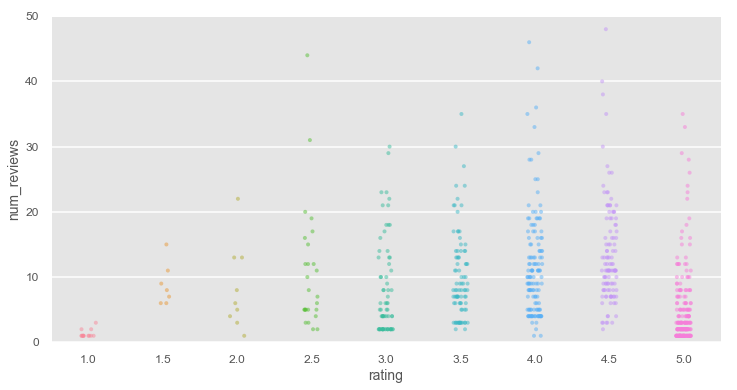

In [581]:
# how to identify top doctors? Those with high scores and a large number of reviews
plt.figure(figsize = (12,6))
sns.stripplot(x="rating", y="num_reviews", data=subdata, size = 4, alpha = 0.5, jitter = True);
plt.ylim(0,50)
# doctors with the poorest ratings are likely to get only a small number of reviews
# bottom doctors: with poor rating (e.g. 2.5) based on a large number of reviews 
# top doctors: perfect score based on large sample size 

C:\Users\yanqi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Overall Rating')

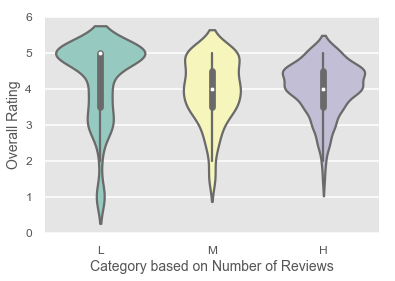

In [582]:
# violin plot to show rating distribution by number of review buckets
ax = sns.violinplot(x= "n_rev_c", y= "rating", data=subdata, palette="Set3")
plt.xlabel('Category based on Number of Reviews')
plt.ylabel('Overall Rating')

Text(0,0.5,'Number of doctors')

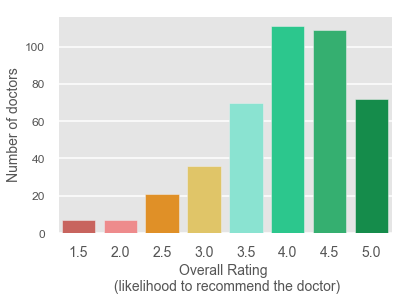

In [601]:
# overall distribution of score among doctors with at least 5 reviews 
n = 5
score = data.loc[ data['num_reviews'] >= n ]

colors = [ "pale red", "salmon pink", "tangerine", "maize", "tiffany blue", \
          "aqua green","algae green","emerald"]

ax = sns.countplot( x = 'rating', data = score, palette = sns.xkcd_palette(colors) )
plt.xticks(fontsize = 14)
plt.xlabel('Overall Rating \n (likelihood to recommend the doctor)', fontsize = 14)
plt.ylabel('Number of doctors', fontsize = 14)

Text(0,0.5,'Number of doctors')

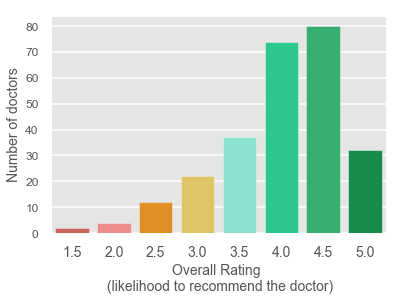

In [584]:
# overall distribution of score among doctors with at least 10 reviews 
n = 10
score = data.loc[ data['num_reviews'] >= n ]

colors = [ "pale red", "salmon pink", "tangerine", "maize", "tiffany blue", \
          "aqua green","algae green","emerald"]

ax = sns.countplot( x = 'rating', data = score, palette = sns.xkcd_palette(colors) )
plt.xticks(fontsize = 14)
plt.xlabel('Overall Rating \n (likelihood to recommend the doctor)', fontsize = 14)
plt.ylabel('Number of doctors', fontsize = 14)

In [ ]:
# seaborn version of the distribution plot
# import seaborn as sns
# from scipy import stats
# sns.set_style("darkgrid")
# bstep = 5
# bmax = int(round(newdata.num_reviews.max()/bstep)*bstep)
# plt.figure(figsize=(12,6))
# sns.distplot(newdata.num_reviews.dropna(),bins = range(0,bmax,bstep), color = "blue", \
#               fit = stats.expon, kde=False, hist_kws={'rwidth':0.7}, fit_kws = {'lw':1})
# plt.xticks(np.arange(-bstep,bmax+2*bstep,bstep*2), fontsize = 12)
# plt.yticks(fontsize = 12) 
#plt.xlim([0,60])

(0, 40)

<Figure size 720x432 with 0 Axes>

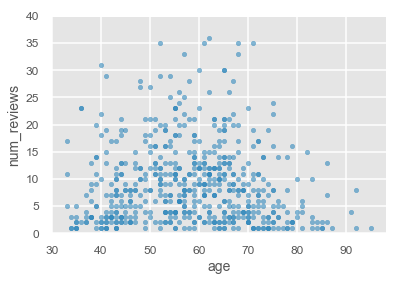

In [594]:
plt.figure(figsize =(10,6))
subdata.plot(kind='scatter',x='age', y='num_reviews', alpha = 0.6)
plt.ylim(0,40)

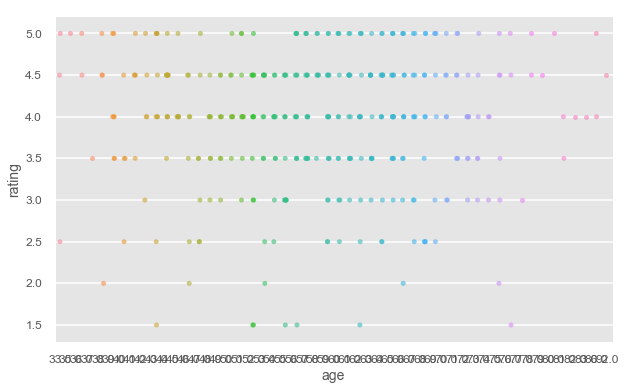

In [602]:
plt.figure(figsize =(10,6))
sns.stripplot(x='age', y='rating', data = score, alpha = 0.6, jitter = True)

# violin or box plot based on age bucket: 

(0, 50)

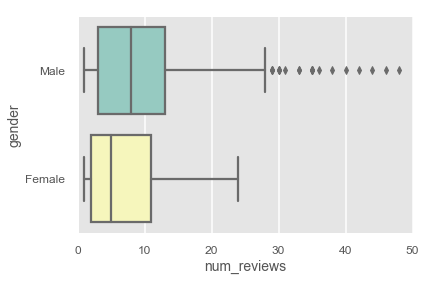

In [585]:
# distribution of reviews by gender
# sns.boxplot(x='gender', y='num_reviews', data=subdata.loc[ subdata['num_reviews'] <= 50 ])
sns.boxplot( y ='gender', x ='num_reviews', data=subdata, palette = 'Set3')
plt.xlim(0, 50)

# Female GI doctors receive seem to have lower visibility among patients and receive fewer reviews
# The doctors who receive extremely large number of reviews are almost all male doctors

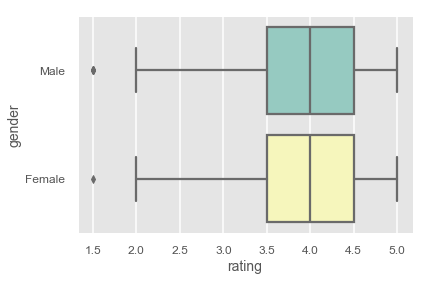

In [590]:
# distribution of overall rating by gender
sns.boxplot( y ='gender', x ='rating', data=score, palette = 'Set3')

# no difference in rating distribution for female & male doctors with 5 or more reviews

In [591]:
numdata = subdata.loc[:,['age', 'num_reviews', 'doc_score', 'staff_score', 'rating']]
numdata.corr(min_periods = 50)

,age,num_reviews,doc_score,staff_score,rating
age,1.000000,-0.059392,-0.029241,-0.054558,-0.025438
num_reviews,-0.059392,1.000000,-0.040358,-0.009390,-0.030143
doc_score,-0.029241,-0.040358,1.000000,0.821325,0.949938
staff_score,-0.054558,-0.009390,0.821325,1.000000,0.831526
rating,-0.025438,-0.030143,0.949938,0.831526,1.000000


In [ ]:
# scores = subdata.loc[:,['doc_trust', 'doc_explain', 'doc_answer','doc_time',\
#                'staff_scheduling','staff_env', 'staff_friendly', 'rating']]
# scores.corr(min_periods = 50)

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(scores.loc[:,['rating','staff_score','doc_score']], \
               alpha=0.2, figsize=(12, 12), diagonal='hist')

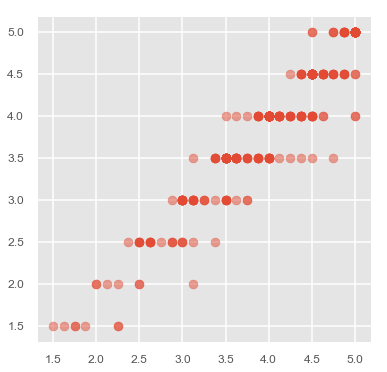

In [610]:
plt.figure(figsize = (6,6))
plt.scatter(x="doc_score", y="rating", data=score, alpha = 0.5);

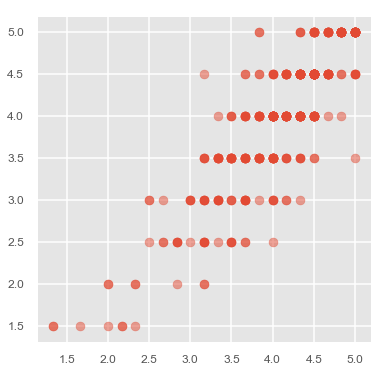

In [611]:
plt.figure(figsize = (6,6))
plt.scatter(x="staff_score", y="rating", data=score, alpha = 0.5);

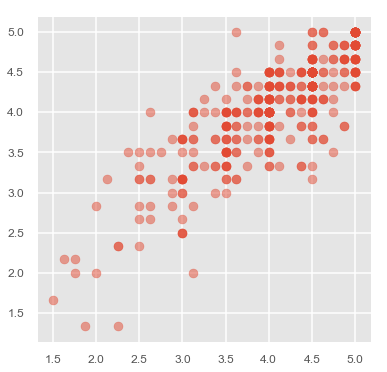

In [612]:
plt.figure(figsize = (6,6))
plt.scatter(x="doc_score", y="staff_score", data=score, alpha = 0.5);